<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 7
<br>Group member1: Joseph Tharayil
<br>Group member2: Kiyarash Farivar
<br>Group member3: Diogo Ramalho

# Ex1: Create your favorite neuron

<font size ="3">Write some code that builds a geometrical model of a neuron with one soma, one axon and two dendrites with three branches and visualize the resulting model. [0.5 pts]


|----------|       soma(0-1)
            `---------|       dend1(0-1)
                       `---------|       dend1_branch1(0-1)
                       `---------|       dend1_branch2(0-1)
                       `---------|       den1_branch3(0-1)
            `---------|       dend2(0-1)
                       `---------|       dend2_branch1(0-1)
                       `---------|       dend2_branch2(0-1)
                       `---------|       den2_branch3(0-1)
 `---------|       axon(0-1)

Wrote cell 0 to cell_exe1.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f91efbf7a20>)

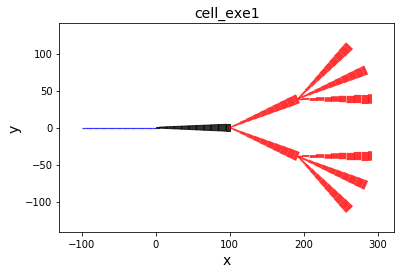

In [3]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy


parts = ['soma',
         'dend1', 'dend1_branch1', 'dend1_branch2', 'den1_branch3',
         'dend2', 'dend2_branch1', 'dend2_branch2', 'den2_branch3',
         'axon']

soma, dend1, d1b1, d1b2, d1b3, dend2, d2b1, d2b2, d2b3, axon = [h.Section(name=n) for n in parts]



# Geometry 
for sec in h.allsec():
    sec.nseg = 10
    sec.L = 100
    for seg in sec:
        seg.diam = numpy.interp(seg.x, [0, 1], [1, 10])
        
#By default the child end 0 connects to the parent end 1.
axon.connect(soma(0))

dend1.connect(soma)
dend2.connect(soma)

_ = [i.connect(dend1) for i in [d1b1, d1b2, d1b3]]

_ = [i.connect(dend2) for i in [d2b1, d2b2, d2b3]]



h.topology()

# Visualize in Noto
neuron2swc('cell_exe1.swc', swap_yz=False)
neuron4 = nm.load_neuron('cell_exe1.swc')
viewer.draw(neuron4)


Wrote cell 0 to cell_a.swc


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0688225ac8>)

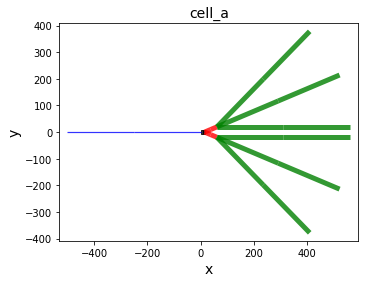

In [1]:
from neuron import h
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc
import numpy

soma = h.Section(name='soma')
soma.L = soma.diam = 15

ax = h.Section(name='axon')
ax.L = 500
ax.diam = 5

d1 = h.Section(name='dend1')
d11 = h.Section(name='d11')
d12 = h.Section(name='d12')
d13 = h.Section(name='d13')

d2 = h.Section(name='dend2')
d21 = h.Section(name='d21')
d22 = h.Section(name='d22')
d23 = h.Section(name='d23')

d1.L = 50
d1.diam = 5

d11.L = 500
d11.diam = 5

d12.L = 500
d12.diam = 5

d13.L = 500
d13.diam = 5

d2.L = 50
d2.diam = 5

d21.L = 500
d21.diam = 5

d22.L = 500
d22.diam = 5

d23.L = 500
d23.diam = 5


ax.connect(soma(0))
d1.connect(soma(1))
d2.connect(soma(1))

d11.connect(d1(1))
d12.connect(d1(1))
d13.connect(d1(1))

d21.connect(d2(1))
d22.connect(d2(1))
d23.connect(d2(1))

neuron2swc('cell_a.swc', swap_yz=False)
neuron4 = nm.load_neuron('cell_a.swc')
viewer.draw(neuron4)

# Ex2: Visualizing neurons

<font size ="3">Select one of the neurons from your group data set. Write a code that visualizes the neuron oriented on the three possible planes (xy, xz and yz) and its neurites. Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled as well. [1.5 pts]

# Ex3: Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group. Some of them are good morphology files and some have mistakes. Write down which files have errors and enumerate their errors. (You can use or copy here the code from tutorial 02). Explain, on your own words, some ideas about how you would correct the mistakes from your bad morphology files. [1.5 pts]

### unzip the Group_07 file and put it in Group_07 folder in current directory ! 

In [7]:
config = {
    'checks': {
        'structural_checks': [
            'is_single_tree',
            'has_valid_soma',
            'has_soma_points',
            'has_sequential_ids',
            'has_increasing_ids',
            'has_valid_neurites',
            'no_missing_parents',
            'has_all_finite_radius_neurites'
        ],
        'neuron_checks': [
            'has_axon',
            'has_basal_dendrite',
            'has_apical_dendrite',
            'has_no_jumps',
            'has_no_fat_ends',
            'has_nonzero_soma_radius',
            'has_all_nonzero_neurite_radii',
            'has_all_nonzero_section_lengths',
            'has_all_nonzero_segment_lengths',
        ]
    },
    'options': {
        'has_nonzero_soma_radius': 0.0,
        "has_all_nonzero_neurite_radii": 0.007,
        "has_all_nonzero_segment_lengths": 0.01,
        "has_all_nonzero_section_lengths": 0.01,
    }
}

In [10]:
from neurom.check.runner import CheckRunner

# Create a "CheckRunner" object by providing the configuration dictionary
check_runner = CheckRunner(config)

# Run on a directory or a morphology
# Atention: change path_to_neurons to the path in which you have placed the files
results = check_runner.run('./Group_07') 

for morph in results['files']:
    
    print ("Morphology: {} \n".format(morph))
    
    checks_dict = results['files'][morph]
    
    # Empty strings for our results
    passed = ""
    failed = ""
    
    # Iterate over dictionary's items
    for check_name, status in checks_dict.items():
        
        # The string with the check's name and status
        string = "\t{0: <50} : {1}\n".format(check_name, status)
    
        # Separate passed from failed checks
        if status is True:
            
            passed += string # Concatenates to the current passed string
            
        else:
            
            failed += string # Concatenats to the current failed string

    #print (passed)
    print(checks_dict['ALL'])
    print (failed)

Morphology: ./Group_07/morph_03.swc 

False
	Has no jumps                                       : False
	ALL                                                : False

Morphology: ./Group_07/morph_07.swc 

False
	Has no jumps                                       : False
	ALL                                                : False

Morphology: ./Group_07/morph_05.swc 

False
	Has apical dendrite                                : False
	Has no jumps                                       : False
	Has no fat ends                                    : False
	ALL                                                : False

Morphology: ./Group_07/morph_04.swc 

False
	Has apical dendrite                                : False
	ALL                                                : False

Morphology: ./Group_07/morph_06.swc 

False
	Has no jumps                                       : False
	ALL                                                : False

Morphology: ./Group_07/morph_01.swc 

False
	Has apical

## Answer:

only cells 2, 9 and 10 seem to be correct.

we can see that we have different types of errors. 
For instance has no jumps can be corrected by just looking at the neuron in 3d plot and intuitively correcting the jump by hand in the coordinates or asking the experimenters to go back to their data and correct the jump.

Has apical dendrite can be corrected by adding the denderite of a similar type of cell or again asking the experimenter to find the data.

# Ex4: Morphometrics

<font size = "3">Now that you know which cells, out of your group data set are morphologically correct, its time to analyze some morphological characteristics of them. 

<font size = "3">Compute: the total_basal_length, the total_axonal_length and the soma_volume of the cells in your group data set that have no mistakes. Represent the result of all the cells on three different histograms: total_basal_length, total_axonal_length and soma_volume. Do you see any differences? If yes, explain them. Would you be able to classify the cells based on these differences?  [2.5 pts]

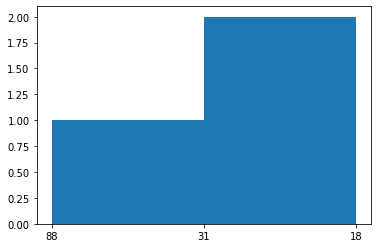

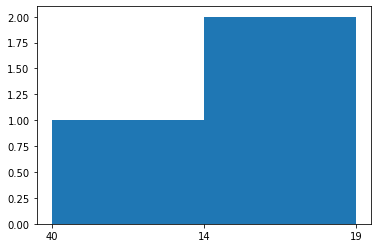

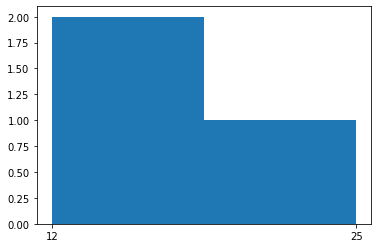

In [12]:
import numpy as np
import neurom as nm

cells = ['02','09','10']

basalLength = np.zeros_like(cells)
axonLength = np.zeros_like(cells)
somaVol = np.zeros_like(cells)

i = 0
for cell in cells:
    neuron = nm.load_neuron('./Group_07/morph_'+cell+'.swc')
    basalLength[i] = np.sum(nm.get('section_lengths',neuron, neurite_type=nm.NeuriteType.basal_dendrite))
    axonLength[i] = np.sum(nm.get('section_lengths',neuron, neurite_type=nm.NeuriteType.axon))
    somaVol[i] = nm.get('soma_volumes',neuron)[0]
    i += 1
    
import matplotlib.pyplot as plt
plt.figure()
plt.hist(basalLength,bins=2)
plt.show()

plt.figure()
plt.hist(axonLength,bins=2)
plt.show()

plt.figure()
plt.hist(somaVol,bins=2)
plt.show()


<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex3 and Ex4.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://watermark.silverchair.com/bhy339.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAnwwggJ4BgkqhkiG9w0BBwagggJpMIICZQIBADCCAl4GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMjL2dxX4XnctI8PSkAgEQgIICL871rzxAccwBPnWDWJYXnmhez2c206RYVCnDmVVfJdui3Y0__27wwcSCeSvs8bMO-ySrUsntk8bkKC0g0_2zqK9F-IRlkpL4X120sWQoyjsnZSRgpQgBRjhTGqEiQFSv6VpT1NS7tw8Ytgz0nxRzd6uVmAJmm4hA3Qt6xerIeKCuUP2LZhWFPCkCqY9Z6vrTWs31nKibrYQyhfebtfrjQUXZM41f-jg19pGQW353OY8X8EHbnlzljAF25bPO1dFcoJ9z1YrIavhUJvrC_ROcrQ_xFpf43nLKtv44PxSR8ynIh1W87NKQjMy09q_SeEqL2rQcbMm_GxJp11_T39iAZeoghTOsj9nbJM1DcZ_EHiPDUimGWP-zX3GgPa5OFMYDW99UlS7aoEhLUMeNOagm1McT8U3SYyKYUSmKuWbxSE4vzzl6i4kfVTZinPCc2pJUO7foA11nzp8Od-BadQFDv4oC306nDSWJWe62Y4qbGmzR4MLnO_Gunf9wmszwyNHckn81sxPmTBmnTKYkYNJLUGjZFluRgw_Ssjvk42kBawDJ338-CdN0zTm7paxSSDTu32ZKLLaEjchehmkt5ecY3qn5cNXgAo-BGoMDN2Cl9h5F_NZlR4vTg2B3vRKKmKfjt1tLqoG8K4FrO3LNE8cmCZ-f3iFGSeDOD_VMFb5O0q68uqnlfRN6Ep56WChWSWRS92wNhGx7rUQAOvK7dJWK7oIPaxXBh55_RpZn2BQI0WQ)